# Description of the Notebook
This Jupyter Notebook was where we tested the Data Engineering Library and developed the data cleaning process.

We also tried to recreate the process of the create dataset script so we could test some specific functions.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the directory containing the module to the system path
module_path = os.path.abspath(os.path.join('C:\\Users\\samue\\OneDrive\\AIML\\HS2024\\Data Sicence Projekt\\HSLU_DSPRO1_TrafficStatus\\data'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import the module
import data_engineering_library as dlib

In [3]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframe_London_UTD19 = dlib.load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London\London_UTD19.csv", nrows=1000000)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [4]:
dataframe_London_UTD19_raw = dataframe_London_UTD19.copy()

In [5]:
# Count occurrences of 0 and 1 in a specific column
counts = dataframe_London_UTD19['error'].value_counts().reindex([0, 1], fill_value=0)
print(counts)

error
0    663870
1    336130
Name: count, dtype: int64


In [6]:
speed = dataframe_London_UTD19['speed'].unique()
speed

array([nan])

In [7]:
# Drop the error column, because it is not needed
dataframe_London_UTD19, errors = dlib.preprocess_dataframe(dataframe_London_UTD19)
print(errors)
dataframe_London_UTD19.head()

336130


,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [8]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

3675

In [9]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='flow')


Total outliers detected and removed: 0


In [10]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='occ')

Total outliers detected and removed: 0


In [11]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='flow', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 16


,day,interval,detid,flow,occ,city,weekday
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday


In [12]:
dataframe_London_UTD19 = dlib.clip_outliers(dataframe_London_UTD19, column='occ', group_by_detid=True, outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers clipped: 10


,day,interval,detid,flow,occ,city,weekday
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday


In [13]:
#Calculate the speed using the formula speed = flow / occupancy
dataframe_London_UTD19 = dlib.calculate_traffic_speed(dataframe_London_UTD19)
dataframe_London_UTD19_raw = dlib.calculate_traffic_speed(dataframe_London_UTD19_raw)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [14]:
dataframe_London_UTD19 = dlib.drop_outliers(dataframe_London_UTD19, column='traffic', group_by_detid=True)
dataframe_London_UTD19.head()

Total outliers dropped: 7596


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [15]:
dataframe_London_UTD19 = dlib.drop_false_values_by_date(dataframe_London_UTD19, column='traffic')
dataframe_London_UTD19.head()

Total outliers detected and removed: 0


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [16]:
dataframe_London_UTD19 = dlib.drop_false_values(dataframe_London_UTD19, column='traffic', outlier_factor=3)
dataframe_London_UTD19.head()

Total outliers detected and removed: 46065


,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0,CNTR_N00/005x1,816.0,0.116667,london,Friday,95.200011
1,2015-05-15,300,CNTR_N00/005x1,708.0,0.096667,london,Friday,68.439991
2,2015-05-15,600,CNTR_N00/005x1,648.0,0.098333,london,Friday,63.720000
3,2015-05-15,900,CNTR_N00/005x1,504.0,0.068333,london,Friday,34.440002
4,2015-05-15,1200,CNTR_N00/005x1,816.0,0.131667,london,Friday,107.440011


In [17]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

139


In [18]:
anomlies_df = dlib.detect_anomalies(dataframe_London_UTD19, column='traffic', min_IQR=5, min_range=20, min_data_points=5000)

TypeError: detect_anomalies() got an unexpected keyword argument 'min_data_points'

In [19]:
len(anomlies_df)

104

In [20]:
dataframe_London_UTD19, anomlies_df = dlib.handle_anomalies(dataframe_London_UTD19, anomlies_df)

Anomalies with not enough data handled: 19
Total amount of dropeed anomalies: 85


In [21]:
handeled_anomalies_df = dlib.handle_detectors_with_bad_days(dataframe_London_UTD19, anomlies_df)
handeled_anomalies_df = handeled_anomalies_df[
    handeled_anomalies_df[['mean_out_of_bound', 'IQR_to_small', 'not_enough_data']].any(axis=1)
]
len(handeled_anomalies_df)

Anomalies with not enough data handled: 0


85

In [22]:
len(dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1'])

0

In [23]:
anomalies = handeled_anomalies_df['detid'].unique()
dataframe_London_UTD19 = dataframe_London_UTD19[~dataframe_London_UTD19['detid'].isin(anomalies)]

In [24]:
# Get the number of unique 'detid' values in the DataFrame
num_unique_detid = dataframe_London_UTD19['detid'].unique()
print(num_unique_detid.size)

54


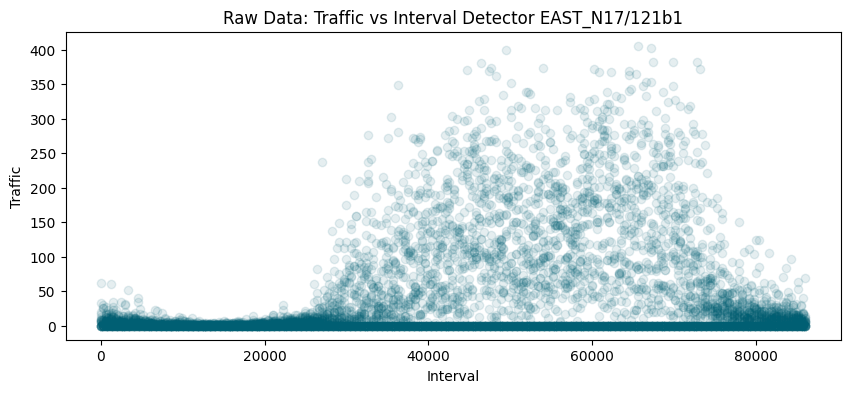

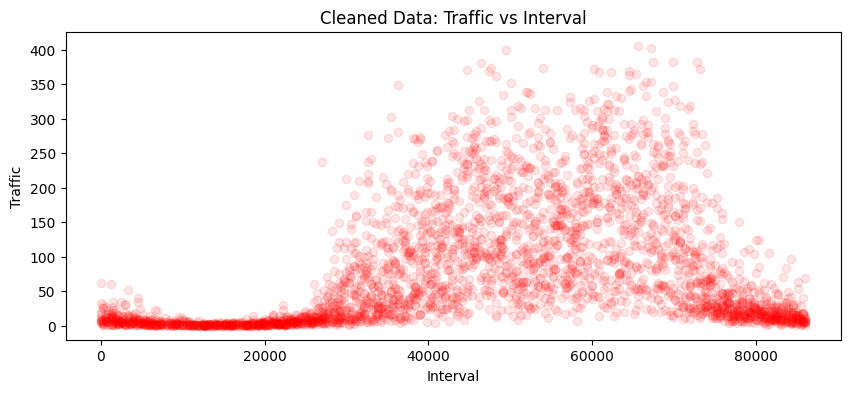

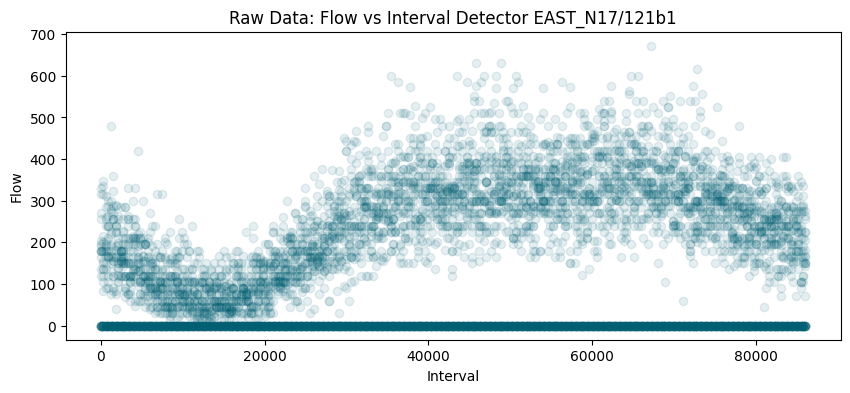

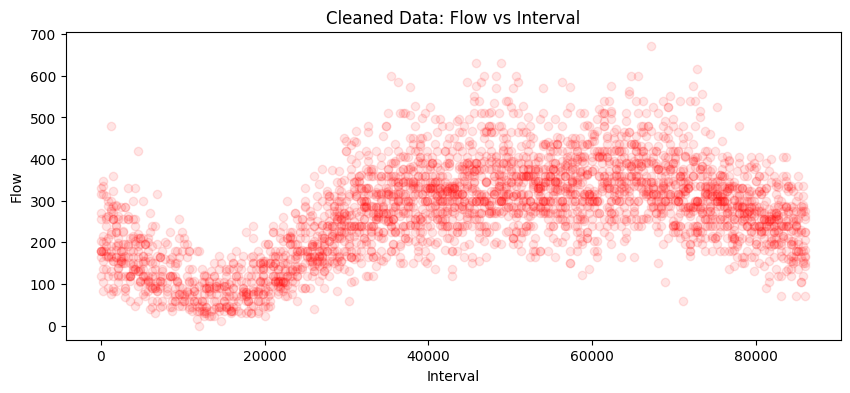

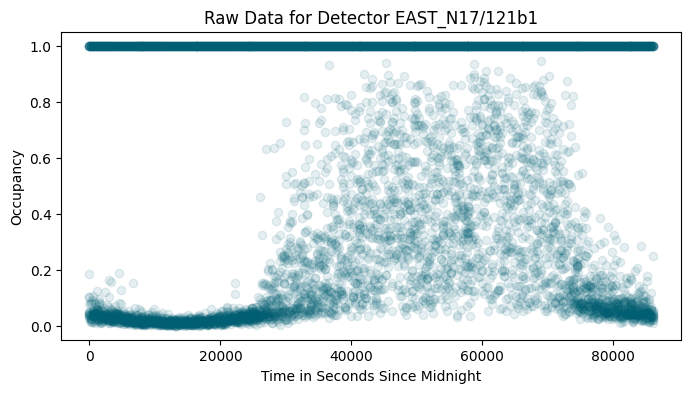

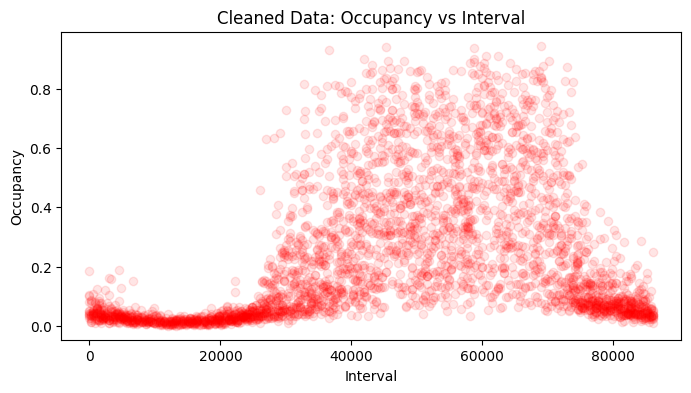

In [21]:
# Plot the speed, traffic and occ of a random detector
# To test the data cleaning process we will plot the data of the detector 'EAST_N17/121b1'
# The function to remove lines with bad data was tested

dataframe_detector = dataframe_London_UTD19_raw[dataframe_London_UTD19_raw['detid'] == 'EAST_N17/121b1']
dataframe_detector_clean = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N17/121b1']
# Plot traffic for raw data
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='#005F73')
plt.xlabel('Interval')
plt.ylabel('Traffic')
plt.title('Raw Data: Traffic vs Interval Detector EAST_N17/121b1')
plt.show()

# Plot traffic for cleaned data
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['traffic'], alpha=0.1, color='red')
plt.xlabel('Interval')
plt.ylabel('Traffic')
plt.title('Cleaned Data: Traffic vs Interval')
plt.show()

# Plot flow for raw data
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['flow'], alpha=0.1, color='#005F73')
plt.xlabel('Interval')
plt.ylabel('Flow')
plt.title('Raw Data: Flow vs Interval Detector EAST_N17/121b1')
plt.show()

# Plot flow for cleaned data
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['flow'], alpha=0.1, color='red')
plt.xlabel('Interval')
plt.ylabel('Flow')
plt.title('Cleaned Data: Flow vs Interval')
plt.show()

# Plot occupancy for raw data
plt.figure(figsize=(8, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['occ'], alpha=0.1, color='#005F73')
plt.xlabel('Time in Seconds Since Midnight')
plt.ylabel('Occupancy')
plt.title('Raw Data for Detector EAST_N17/121b1')
plt.show()

# Plot occupancy for cleaned data
plt.figure(figsize=(8, 4))
plt.scatter(dataframe_detector_clean['interval'], dataframe_detector_clean['occ'], alpha=0.1, color='red')
plt.xlabel('Interval')
plt.ylabel('Occupancy')
plt.title('Cleaned Data: Occupancy vs Interval')
plt.show()

In [26]:
# select a random detector
unique_detectors = dataframe_London_UTD19['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
dataframe_random_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
print(f"Selected detector: {random_detector}")
dataframe_random_detector.head()

Selected detector: CNTR_N01/009g1


,day,interval,detid,flow,occ,city,weekday,traffic
18345,2015-05-15,0,CNTR_N01/009g1,708.0,0.320000,london,Friday,226.560014
18346,2015-05-15,300,CNTR_N01/009g1,492.0,0.390833,london,Friday,192.290003
18347,2015-05-15,600,CNTR_N01/009g1,708.0,0.371667,london,Friday,263.140009
18348,2015-05-15,900,CNTR_N01/009g1,576.0,0.397500,london,Friday,228.960000
18349,2015-05-15,1200,CNTR_N01/009g1,576.0,0.500000,london,Friday,288.000000


Special random detectors 
- EAST_N17/121b1
- CNTR_N01/067k1
- CNTR_N01/009u1
- CNTR_N01/105b2

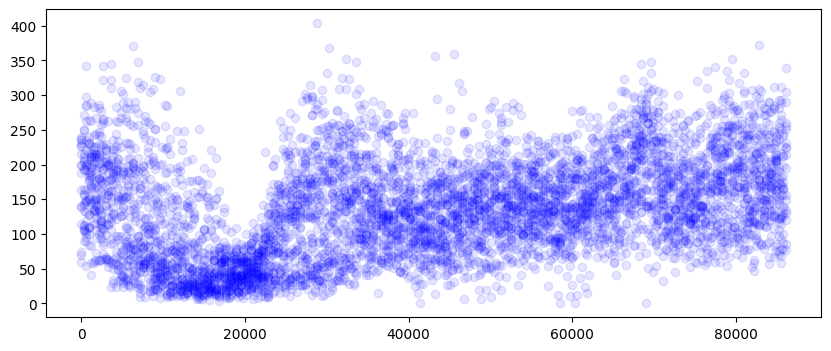

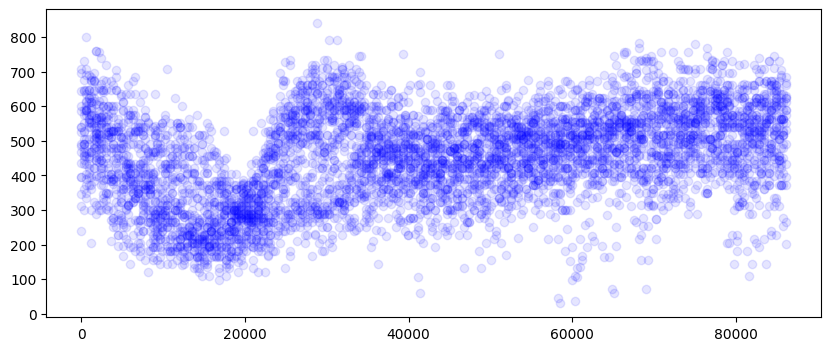

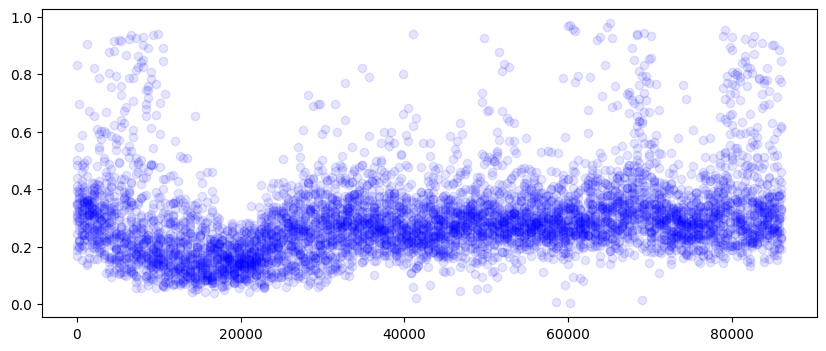

In [27]:
#Plot the speed, traffic and occ of a random detector
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_detector['interval'], dataframe_random_detector['occ'], alpha=0.1, color='blue')
plt.show()

In [28]:
# Select a random day
unique_days = dataframe_random_detector['weekday'].unique()
random_day = pd.Series(unique_days).sample(1).iloc[0]
dataframe_random_day = dataframe_random_detector[dataframe_random_detector['weekday'] == random_day]
print(f"Selected day: {random_day}")
dataframe_random_day.head()

Selected day: Saturday


,day,interval,detid,flow,occ,city,weekday,traffic
18598,2015-05-16,0,CNTR_N01/009g1,240.0,0.831667,london,Saturday,199.599998
18599,2015-05-16,300,CNTR_N01/009g1,360.0,0.695000,london,Saturday,250.200000
18600,2015-05-16,600,CNTR_N01/009g1,336.0,0.589167,london,Saturday,197.959984
18601,2015-05-16,900,CNTR_N01/009g1,432.0,0.406667,london,Saturday,175.680006
18602,2015-05-16,1200,CNTR_N01/009g1,204.0,0.904167,london,Saturday,184.449995


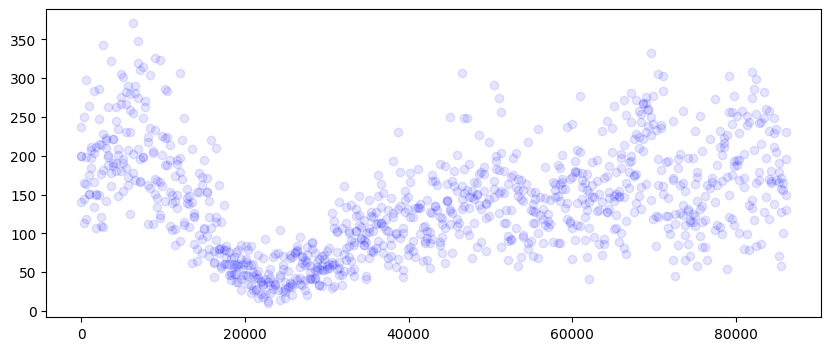

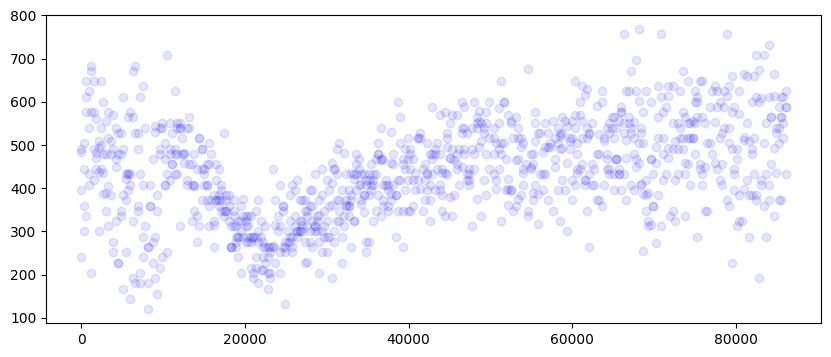

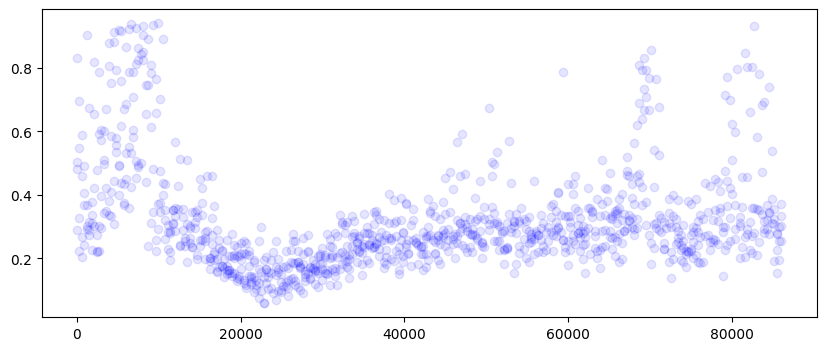

In [29]:
#Plot the speed, traffic an occ of a random detector on a random day 
#Just for testing and visualization purposes to get a better understanding of the data

plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['traffic'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['flow'], alpha=0.1, color='blue')
plt.show()
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_random_day['interval'], dataframe_random_day['occ'], alpha=0.1, color='blue')
plt.show()

### Development of the combine datapoints function
We wrote a sample function that calculates the mean in a specific interval and tested the function on random detectors from the dataset.

In [24]:
dataframe_London_UTD19_mean = dataframe_London_UTD19.copy()
dataframe_London_UTD19_mean['interval'] = (dataframe_London_UTD19_mean['interval'] / 1500).round() * 1000
dataframe_London_UTD19_mean.head(20)

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-15,0.0,CNTR_N00/005x1,816.00000,0.116667,london,Friday,95.200011
1,2015-05-15,0.0,CNTR_N00/005x1,708.00000,0.096667,london,Friday,68.439991
2,2015-05-15,0.0,CNTR_N00/005x1,648.00000,0.098333,london,Friday,63.720000
3,2015-05-15,1000.0,CNTR_N00/005x1,504.00000,0.068333,london,Friday,34.440002
4,2015-05-15,1000.0,CNTR_N00/005x1,816.00000,0.131667,london,Friday,107.440011
5,2015-05-15,1000.0,CNTR_N00/005x1,504.00000,0.077500,london,Friday,39.059996
6,2015-05-15,1000.0,CNTR_N00/005x1,580.88134,0.090777,london,Friday,52.730574
7,2015-05-15,1000.0,CNTR_N00/005x1,528.81356,0.081780,london,Friday,43.246194
8,2015-05-15,2000.0,CNTR_N00/005x1,880.96552,0.105546,london,Friday,92.982366
9,2015-05-15,2000.0,CNTR_N00/005x1,480.00000,0.072500,london,Friday,34.800004


In [25]:
#Create ne dataframe with the mean values of the traffic first step in the testing of the combine datapoints function 

grouped_mean = dataframe_London_UTD19_mean.groupby(['interval', 'day', 'detid', 'weekday']).mean('traffic').reset_index()
grouped_mean.head()


,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N00/005x1,Friday,724.0,0.103889,75.786667
1,0.0,2015-05-15,CNTR_N00/005x2,Friday,612.0,0.089167,55.120000
2,0.0,2015-05-15,CNTR_N01/007a1,Friday,396.0,0.409444,165.286666
3,0.0,2015-05-15,CNTR_N01/007c1,Friday,436.0,0.402778,178.349999
4,0.0,2015-05-15,CNTR_N01/007z1,Friday,740.0,0.281667,208.236657


In [26]:
# Combine the datapoints to 1 hour intervals

grouped_mean = dataframe_London_UTD19.copy()
grouped_mean = dlib.combine_datapoints(grouped_mean, ratio=3600)
grouped_mean.head()

,interval,day,detid,weekday,flow,occ,traffic
0,0.0,2015-05-15,CNTR_N00/005x1,Friday,653.840191,0.097135,65.861512
1,0.0,2015-05-15,CNTR_N00/005x2,Friday,656.813560,0.090946,63.826682
2,0.0,2015-05-15,CNTR_N01/007a1,Friday,410.208234,0.411203,168.797089
3,0.0,2015-05-15,CNTR_N01/007c1,Friday,439.263923,0.417296,186.321718
4,0.0,2015-05-15,CNTR_N01/007z1,Friday,710.498786,0.304964,214.210231


In [27]:
# Check if the interval is correct
grouped_mean['interval'].unique()

array([    0.,  3600.,  7200., 10800., 14400., 18000., 21600., 25200.,
       28800., 32400., 36000., 39600., 43200., 46800., 50400., 54000.,
       57600., 61200., 64800., 68400., 72000., 75600., 79200., 82800.,
       86400.])

Selected detector: CNTR_N01/392q1


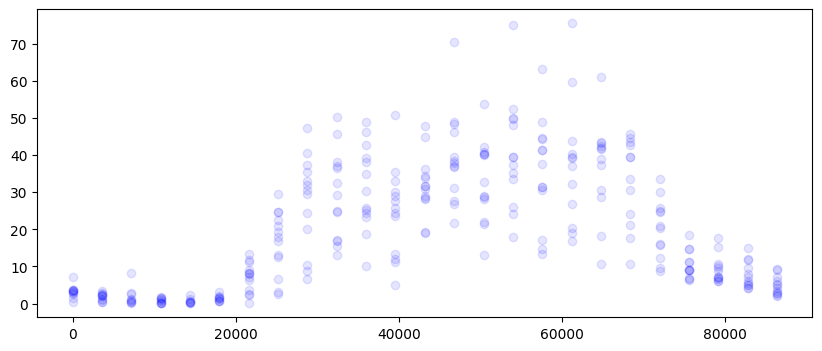

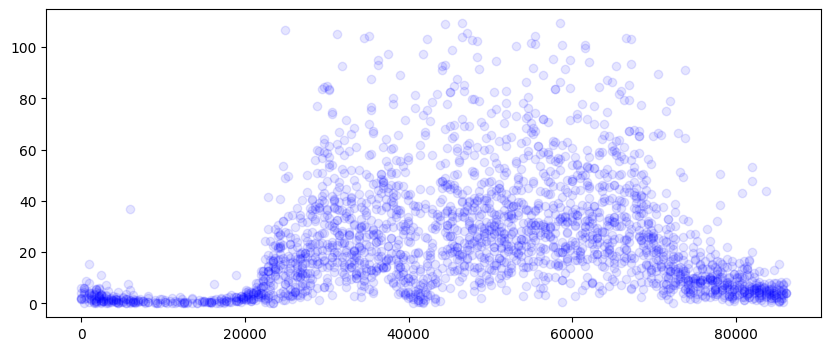

In [28]:
# Testing the combine_datapoints function

unique_detectors = grouped_mean['detid'].unique()
random_detector = pd.Series(unique_detectors).sample(1).iloc[0]
print(f"Selected detector: {random_detector}")
dataframe_detector = grouped_mean[grouped_mean['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()
dataframe_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]
plt.figure(figsize=(10, 4))
plt.scatter(dataframe_detector['interval'], dataframe_detector['traffic'], alpha=0.1, color='blue')
plt.show()



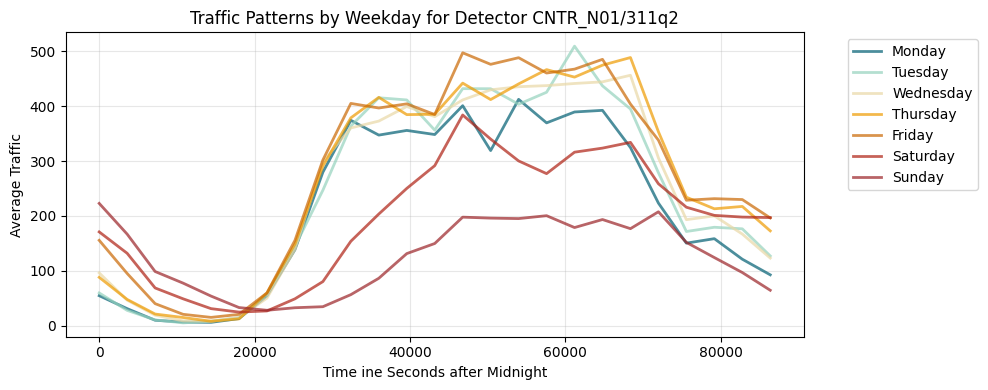

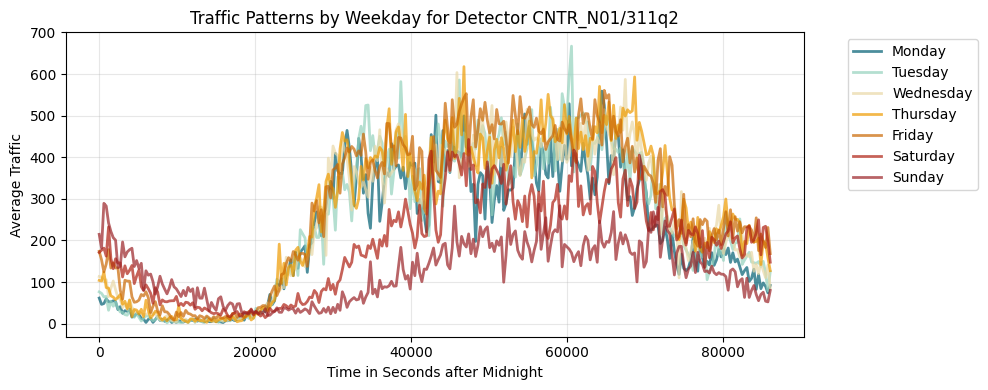

In [33]:
#plot the traffic patterns by weekday for a random detector with the raw data and one with the combined datapoints

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['#005F73', '#94D2BD', '#E9D8A6', '#EE9B00', '#CA6702', '#AE2012', '#9B2226']

random_detector = "CNTR_N01/311q2" 

plt.figure(figsize=(10, 4))
dataframe_detector = grouped_mean[grouped_mean['detid'] == random_detector]

for weekday, color in zip(weekdays, colors):
    weekday_data = dataframe_detector[dataframe_detector['weekday'] == weekday]
    weekday_mean = weekday_data.groupby('interval')['traffic'].mean()
    plt.plot(weekday_mean.index, weekday_mean.values, label=weekday, color=color, linewidth=2, alpha=0.7)

plt.title(f'Traffic Patterns by Weekday for Detector {random_detector}')
plt.xlabel('Time ine Seconds after Midnight')
plt.ylabel('Average Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
dataframe_detector = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == random_detector]

for weekday, color in zip(weekdays, colors):
    weekday_data = dataframe_detector[dataframe_detector['weekday'] == weekday]
    weekday_mean = weekday_data.groupby('interval')['traffic'].mean()
    plt.plot(weekday_mean.index, weekday_mean.values, label=weekday, color=color, linewidth=2, alpha=0.7)

plt.title(f'Traffic Patterns by Weekday for Detector {random_detector}')
plt.xlabel('Time in Seconds after Midnight')
plt.ylabel('Average Traffic')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()